<a href="https://colab.research.google.com/github/VVKMulukutla/FML/blob/main/UnivariateLR_CompanyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Necessary Packages have been Imported.
Packages incluse : **mumpy, pandas, seaborn, sklearn.model_selection, sklearn.linear_model**

In [106]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lr

The Univariate Linear regression is to be done on the *Company_data.csv*

In [2]:
company_data = pd.read_csv('/content/drive/MyDrive/Company_data.csv')
print(company_data)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


*Sample EDA* is performed.

In [8]:
print(company_data.columns)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [9]:
print(company_data.shape)
print(company_data.isnull().sum())

(200, 4)
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [4]:
company_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


*Visual Representative relations*(**Scatterplot, heatmap**) are plotter via the Seaborn library

<Axes: xlabel='TV', ylabel='Sales'>

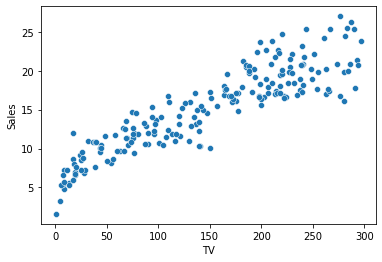

In [13]:
sns.scatterplot(x = 'TV', y= 'Sales', data = company_data)

<Axes: xlabel='Newspaper', ylabel='Sales'>

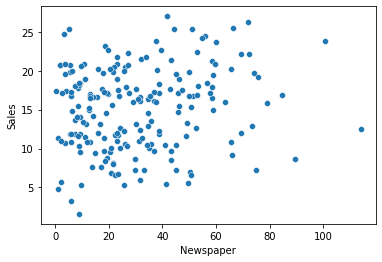

In [17]:
sns.scatterplot(x = 'Newspaper', y = 'Sales', data=company_data)

<Axes: xlabel='Radio', ylabel='Sales'>

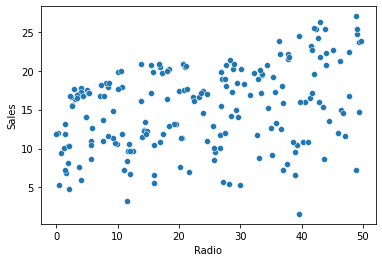

In [19]:
sns.scatterplot(x='Radio', y='Sales', data=company_data)

Correlations for column considerations are done.
**TV, Sales** Are Taken.

In [21]:
company_data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

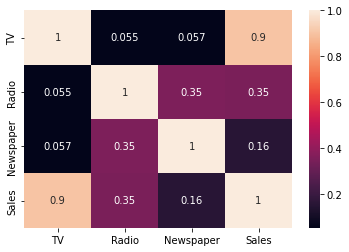

In [24]:
sns.heatmap(company_data.corr(), annot =True) #from sklearn.model_selection  import train_test_split

Data-Splitting is done via train_test_split.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(company_data[['TV']], company_data[['Sales']], test_size=0.25, shuffle=True, random_state=42)

Columns Reshaped to correct format.

In [80]:
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)

X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

Created an object for LinearRegression model

In [82]:
reg = lr()
reg.fit(X_train, y_train)

LinearRegression()

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Calculated the Train data Predictions

Found Loss on train data

In [84]:
y_pred_train = reg.predict(X_train)

In [85]:
print('Mean Absolute Error on Train data : ', mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error on Train data : ', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error on Train data : ', mean_squared_error(y_train, y_pred_train)**0.5)
print('R2_Score Evaultion Metric on train data : ', r2_score(y_train, y_pred_train))

Mean Absolute Error on Train data :  1.8203818541994503
Mean Squared Error on Train data :  5.136151288979386
Root Mean Squared Error on Train data :  2.2663078539729296
R2_Score Evaultion Metric on train data :  0.811194552365148


Found Test Data Predictions and Error on test data.

In [86]:
y_pred_test = reg.predict(X_test)

In [66]:
print('Mean Absolute Error on Test data : ', mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error on Test data : ', mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error on Test data : ', mean_squared_error(y_test, y_pred_test)**0.5)
print('R2_Score Evaultion Metric on Test data : ', r2_score(y_test, y_pred_test))

Mean Absolute Error on Test data :  1.8651146911099161
Mean Squared Error on Test data :  5.513351187165511
Root Mean Squared Error on Test data :  2.3480526372220685
R2_Score Evaultion Metric on Test data :  0.7971876919875108


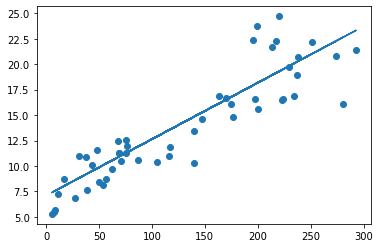

In [105]:

plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test)